In [1]:
import numpy as np
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline

(HD --> Hydrogen-deuterium)

(1) Calculate the energies of the lowest 4 rotational states of HD (including the ground state). Assume an intranuclear separation of 0.0741 nm.

(2) Use these to calculate the wavelengths of the lowest two pure-rotational transitions of HD

(3) Assuming a rotational level degeneracy of $(2J+1)$, calculate the populations of the $J=1$ and $J=3$ states relative to that of the $J=0$ state at 50 K and at 500 K.

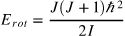

In [38]:
J = np.array([0,1,2,3,4])
hbar = 1.0546e-27 *u.cm**2 *u.g /u.s
m_r = (1/((1/1.67e-27) + (1/3.34e-27)) *u.kg).to(u.g)
r_0 = (0.0741e-9 * u.m).to(u.cm)
I = (r_0**2 * m_r)
E_rot = (J*(J+1)*hbar**2/(2*I)).to(u.eV)
print(E_rot)

[0.         0.01135543 0.03406628 0.06813257 0.11355428] eV


In [52]:
#Use E = hc/lambda to convert from energies to wavelengths
E_joules = E_rot.to(u.J)
E_1_to_0 = E_joules[1] - E_joules[0]
E_2_to_1 = E_joules[2] - E_joules[1]
#E = np.array([E_1_to_0,E_2_to_1])
h = hbar * np.pi
c = (3e8*u.m/u.s).to(u.cm/u.s)
print('1 to 0 transition has wavelength', "{:.7f}".format((h*c/E_1_to_0).decompose()))
print('2 to 1 transition has wavelength', "{:.7f}".format((h*c/E_2_to_1).decompose()))

1 to 0 transition has wavelength 0.0000546 m
2 to 1 transition has wavelength 0.0000273 m


In [53]:
#degeneracy = (2J + 1)
g_3 = 7
g_1 = 3
g_0 = 1
#can assume, to ~first order, that T_kin = T_exc
#use equation 7.8 from Draine, then proceed. Das Ende.